<a href="https://colab.research.google.com/github/daiduong101202/AI--ChieuT6/blob/main/AI_10_3_23_DC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=651eb7501f4ec869cdebd58ecec8ff43daa8764dea747dbe4b93d775279b9d64
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


123.33333333333474


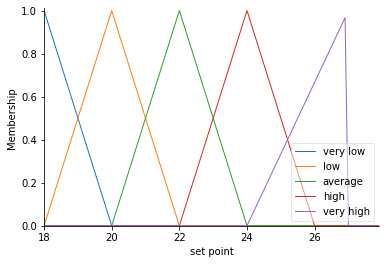

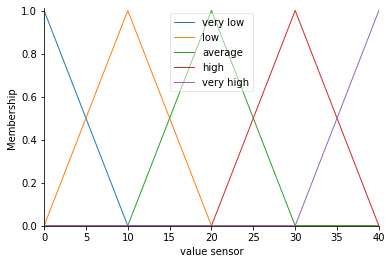

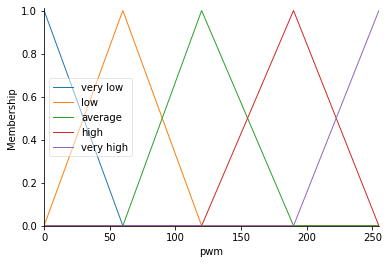

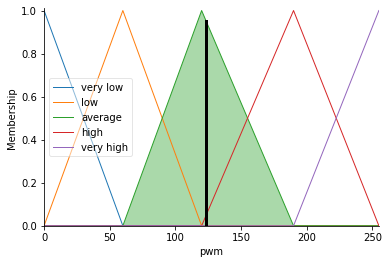

In [24]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
setpoint=ctrl.Antecedent(np.arange(18,28,0.1),'set point')
val_sensor=ctrl.Antecedent(np.arange(0,41,1),'value sensor')
pwm=ctrl.Consequent(np.arange(0,256,1),'pwm')
setpoint['very low']=fuzz.trimf(setpoint.universe,[18,18,20])
setpoint['low']=fuzz.trimf(setpoint.universe,[18,20,22])
setpoint['average']=fuzz.trimf(setpoint.universe,[20,22,24])
setpoint['high']=fuzz.trimf(setpoint.universe,[22,24,26])
setpoint['very high']=fuzz.trimf(setpoint.universe,[24,27,27])

val_sensor['very low']=fuzz.trimf(val_sensor.universe,[0,0,10])
val_sensor['low']=fuzz.trimf(val_sensor.universe,[0,10,20])
val_sensor['average']=fuzz.trimf(val_sensor.universe,[10,20,30])
val_sensor['high']=fuzz.trimf(val_sensor.universe,[20,30,40])
val_sensor['very high']=fuzz.trimf(val_sensor.universe,[30,40,40])

pwm['very low']=fuzz.trimf(pwm.universe,[0,0,60])
pwm['low']=fuzz.trimf(pwm.universe,[0,60,120])
pwm['average']=fuzz.trimf(pwm.universe,[60,120,190])
pwm['high']=fuzz.trimf(pwm.universe,[120,190,255])
pwm['very high']=fuzz.trimf(pwm.universe,[190,255,255])

setpoint.view()
val_sensor.view()
pwm.view()

rule1=ctrl.Rule(setpoint['very low'] & val_sensor['very low'],pwm['very low'])
rule2=ctrl.Rule(setpoint['very low'] & val_sensor['low'],pwm['very low'])
rule3=ctrl.Rule(setpoint['very low'] & val_sensor['average'],pwm['low'])
rule4=ctrl.Rule(setpoint['very low'] & val_sensor['high'],pwm['average'])
rule5=ctrl.Rule(setpoint['very low'] & val_sensor['very high'],pwm['average'])

rule6=ctrl.Rule(setpoint['low'] & val_sensor['very low'],pwm['very low'])
rule7=ctrl.Rule(setpoint['low'] & val_sensor['low'],pwm['low'])
rule8=ctrl.Rule(setpoint['low'] & val_sensor['average'],pwm['low'])
rule9=ctrl.Rule(setpoint['low'] & val_sensor['high'],pwm['average'])
rule10=ctrl.Rule(setpoint['low'] & val_sensor['very high'],pwm['average'])

rule11=ctrl.Rule(setpoint['average'] & val_sensor['very low'],pwm['low'])
rule12=ctrl.Rule(setpoint['average'] & val_sensor['low'],pwm['low'])
rule13=ctrl.Rule(setpoint['average'] & val_sensor['average'],pwm['average'])
rule14=ctrl.Rule(setpoint['average'] & val_sensor['high'],pwm['high'])
rule15=ctrl.Rule(setpoint['average'] & val_sensor['very high'],pwm['high'])

rule16=ctrl.Rule(setpoint['high'] & val_sensor['very low'],pwm['average'])
rule17=ctrl.Rule(setpoint['high'] & val_sensor['low'],pwm['average'])
rule18=ctrl.Rule(setpoint['high'] & val_sensor['average'],pwm['high'])
rule19=ctrl.Rule(setpoint['high'] & val_sensor['high'],pwm['high'])
rule20=ctrl.Rule(setpoint['high'] & val_sensor['very high'],pwm['very high'])

rule21=ctrl.Rule(setpoint['very high'] & val_sensor['very low'],pwm['high'])
rule22=ctrl.Rule(setpoint['very high'] & val_sensor['low'],pwm['high'])
rule23=ctrl.Rule(setpoint['very high'] & val_sensor['average'],pwm['very high'])
rule24=ctrl.Rule(setpoint['very high'] & val_sensor['high'],pwm['very high'])
rule25=ctrl.Rule(setpoint['very high'] & val_sensor['very high'],pwm['very high'])

pwm_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25]) #taphopcacluat
pwm_pulse=ctrl.ControlSystemSimulation(pwm_ctrl)
pwm_pulse.input['set point']=20
pwm_pulse.input['value sensor']=30
pwm_pulse.compute()
print(pwm_pulse.output['pwm'])
pwm.view(sim=pwm_pulse)